In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from load_data import load_data

In [2]:
df = load_data()

In [3]:
discount_analysis = df.groupby('discount_applied').agg(
    avg_order_value=('final_amount', 'mean'),
    total_revenue=('final_amount', 'sum'),
    num_orders=('order_id', 'count')
)

discount_analysis

,avg_order_value,total_revenue,num_orders
discount_applied,,,
0,343.918841,103863.4900,302
5,331.992770,91630.0045,276
10,285.576414,66253.7280,232
15,273.423240,42107.1790,154
20,236.608167,8517.8940,36


<Axes: xlabel='discount_applied', ylabel='avg_order_value'>

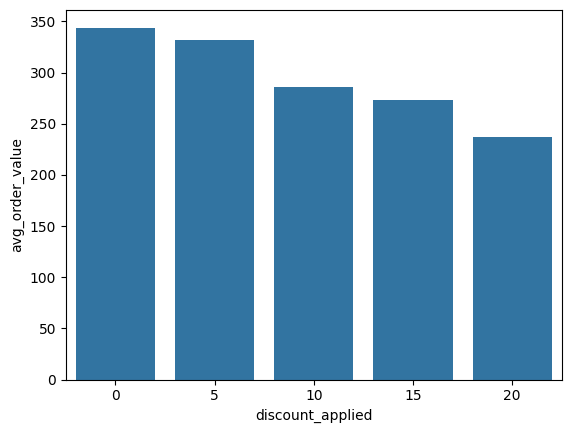

In [ ]:
# bar chart showing average order value by discount level
sns.barplot(data=discount_analysis, x=discount_analysis.index, y=discount_analysis.avg_order_value)

In [ ]:
# Calculate total discount amount given across all orders
total_discount_amount=df['discounted_amount'].sum().round(2)
total_discount_amount

np.float64(297466.18)

In [ ]:
# Analyze the correlation between discount percentage and final order value
df['final_amount'].corr(df['discount_applied']).round(2)

np.float64(-0.14)

In [ ]:
# Identify the most effective discount percentage
most_effective_discount= discount_analysis.sort_values(by='num_orders', ascending=False).head(1)
most_effective_discount

,avg_order_value,total_revenue,num_orders
discount_applied,,,
0,343.918841,103863.49,302


In [ ]:
# Calculate revenue impact of discounts
discount_analysis['revenue_per_order']= (discount_analysis['total_revenue']/discount_analysis['num_orders']).round(2)
discount_analysis

,avg_order_value,total_revenue,num_orders,revenue_per_order
discount_applied,,,,
0,343.918841,103863.4900,302,343.92
5,331.992770,91630.0045,276,331.99
10,285.576414,66253.7280,232,285.58
15,273.423240,42107.1790,154,273.42
20,236.608167,8517.8940,36,236.61


<Axes: xlabel='discount_applied', ylabel='revenue_per_order'>

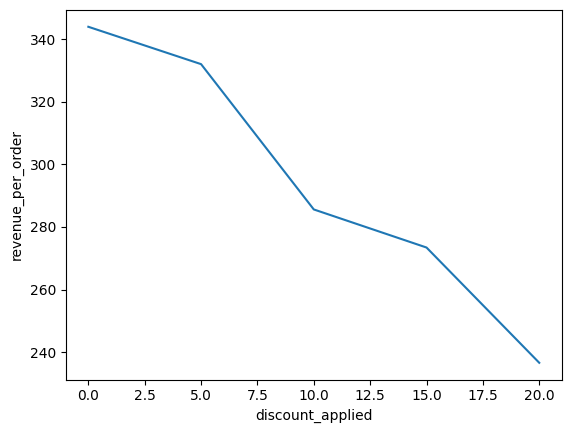

In [9]:
sns.lineplot(data=discount_analysis, x=discount_analysis.index, y=discount_analysis.revenue_per_order)